## 공정 환경변수 csv

1. 패키지 import

In [79]:
# 기본 패키지
import pandas as pd
import numpy as np
import datetime

# 디렉토리 관련 패키지
import os
import glob

# 시각화 관련 패키지
import seaborn as sns

2. 공정 환경변수 csv 파일 불러오기

In [58]:
# 역슬래시 r로 처리
root_dir = r'C:\localRepository\Bigdata_busan\csy\res\variable\\'
f_lists = os.listdir(root_dir)
print('File Lists :', f_lists)

File Lists : ['Error Lot list.csv', 'kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.01.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-abh-se

In [59]:
# 파일 리스트에서 '.csv'로 끝나는 파일만 새로운 리스트로 구성
new_file_lists = [f for f in f_lists if f.endswith('.csv')]
print('File Lists :', new_file_lists)

File Lists : ['Error Lot list.csv', 'kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.01.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-abh-se

In [60]:
# Input과 Output으로 사용될 데이터를 슬라이싱을 통해 지정
data_lists = new_file_lists[1:]
error_list = new_file_lists[0]
print('Data Lista :', data_lists)
print('Error Data List :', error_list)

Data Lista : ['kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.01.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-abh-sensor-2021.10.21.csv', 

3. 데이터 가져오기 위한 function 정의

In [62]:
def csv_read_(data_dir, data_list):
    tmp = pd.read_csv(os.path.join(data_dir, data_list), sep=',', encoding='utf-8')
    # 파일명에서 날짜만 추출
    y, m, d = map(int, data_list.split('-')[-1].split('.')[:-1])
    time = tmp['Time']
    # DTime 컬럼을 위한 정의
    # 파일명에서 추출한 날짜를 'yyyy-mm-dd' 형태로 만들기
    tmp['DTime'] = '-'.join(data_list.split('-')[-1].split('.')[:-1])
    # 오후 → 'PM', 오전 → 'AM'
    # u : 유니코드라는 뜻, 없어도 되지만 적어주면 더 정확하다
    ctime = time.apply(lambda _ : _.replace(u'오후', 'PM').replace(u'오전', 'AM'))
    # datetime.datetime.strptime : 문자열을 datetime으로 변환하고, 년,월,일,시,분,초,마이크로초 까지 나타낸다
    n_time = ctime.apply(lambda _ : datetime.datetime.strptime(_, "%p %I:%M:%S.%f"))
    # 미리 정의해둔 y, m, d 대입하기
    newtime = n_time.apply(lambda _ : _.replace(year=y, month=m, day=d))
    tmp['Time'] = newtime
    return tmp

4. Merge로 DataFrame 합치기

In [64]:
# csv 파일 0번과 1~끝까지 merge
dd = csv_read_(root_dir, data_lists[0])
for i in range(1, len(data_lists)):
    dd = pd.merge(dd, csv_read_(root_dir, data_lists[i]), how='outer')
dd

,Index,Lot,Time,pH,Temp,Voltage,DTime
0,1,1,2021-09-06 16:29:54.000,2.15,43.15,19.74,2021-09-06
1,2,1,2021-09-06 16:29:59.000,2.08,40.13,18.01,2021-09-06
2,3,1,2021-09-06 16:30:04.000,2.18,43.46,18.73,2021-09-06
3,4,1,2021-09-06 16:30:09.000,1.99,41.72,16.75,2021-09-06
4,5,1,2021-09-06 16:30:14.000,1.85,43.65,18.02,2021-09-06
...,...,...,...,...,...,...,...
50089,1514,22,2021-10-27 18:36:03.300,2.05,42.84,15.38,2021-10-27
50090,1515,22,2021-10-27 18:36:08.300,1.91,42.64,19.08,2021-10-27
50091,1516,22,2021-10-27 18:36:13.300,2.11,44.09,18.14,2021-10-27
50092,1517,22,2021-10-27 18:36:18.300,1.92,43.95,17.96,2021-10-27


5. 사용하지 않는 컬럼 제거

In [66]:
dd = dd.drop('Index', axis=1)
dd.head()

,Lot,Time,pH,Temp,Voltage,DTime
0,1,2021-09-06 16:29:54,2.15,43.15,19.74,2021-09-06
1,1,2021-09-06 16:29:59,2.08,40.13,18.01,2021-09-06
2,1,2021-09-06 16:30:04,2.18,43.46,18.73,2021-09-06
3,1,2021-09-06 16:30:09,1.99,41.72,16.75,2021-09-06
4,1,2021-09-06 16:30:14,1.85,43.65,18.02,2021-09-06


6. Time 컬럼을 인덱스로 설정

In [67]:
dd = dd.set_index('Time')
dd

,Lot,pH,Temp,Voltage,DTime
Time,,,,,
2021-09-06 16:29:54.000,1,2.15,43.15,19.74,2021-09-06
2021-09-06 16:29:59.000,1,2.08,40.13,18.01,2021-09-06
2021-09-06 16:30:04.000,1,2.18,43.46,18.73,2021-09-06
2021-09-06 16:30:09.000,1,1.99,41.72,16.75,2021-09-06
2021-09-06 16:30:14.000,1,1.85,43.65,18.02,2021-09-06
...,...,...,...,...,...
2021-10-27 18:36:03.300,22,2.05,42.84,15.38,2021-10-27
2021-10-27 18:36:08.300,22,1.91,42.64,19.08,2021-10-27
2021-10-27 18:36:13.300,22,2.11,44.09,18.14,2021-10-27


## 데이터 탐색

1. 탐색을 위한 데이터 사본 생성

In [68]:
dedicated_data = dd.copy()
dedicated_data.head()

,Lot,pH,Temp,Voltage,DTime
Time,,,,,
2021-09-06 16:29:54,1,2.15,43.15,19.74,2021-09-06
2021-09-06 16:29:59,1,2.08,40.13,18.01,2021-09-06
2021-09-06 16:30:04,1,2.18,43.46,18.73,2021-09-06
2021-09-06 16:30:09,1,1.99,41.72,16.75,2021-09-06
2021-09-06 16:30:14,1,1.85,43.65,18.02,2021-09-06


2. 데이터 컬럼 확인

In [69]:
dedicated_data.columns

Index(['Lot', 'pH', 'Temp', 'Voltage', 'DTime'], dtype='object')

3. 데이터 프레임 요약

In [70]:
dedicated_data.describe()

,Lot,pH,Temp,Voltage
count,50094.000000,50094.000000,50094.000000,50094.000000
mean,11.500000,2.008331,42.454195,17.452394
std,6.344352,0.123021,1.471800,1.458218
min,1.000000,1.810000,33.140000,10.230000
25%,6.000000,1.910000,41.300000,16.300000
50%,11.500000,2.010000,42.480000,17.480000
75%,17.000000,2.100000,43.650000,18.640000
max,22.000000,2.490000,44.990000,19.990000


4. 데이터 프레임 크기 확인

In [72]:
dedicated_data.shape

(50094, 5)

5. 데이터 프레임 정보 확인

In [73]:
dedicated_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50094 entries, 2021-09-06 16:29:54 to 2021-10-27 18:36:23.300000
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Lot      50094 non-null  int64  
 1   pH       50094 non-null  float64
 2   Temp     50094 non-null  float64
 3   Voltage  50094 non-null  float64
 4   DTime    50094 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.3+ MB


6. 데이터 프레임 null값 개수 카운트

In [74]:
# isna() : Index마다 null값이 있으면 True 반환
dedicated_data.isna().sum()

Lot        0
pH         0
Temp       0
Voltage    0
DTime      0
dtype: int64

7. 데이터 시각화를 통한 histogram 확인

array([[<AxesSubplot:title={'center':'Lot'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'Temp'}>,
        <AxesSubplot:title={'center':'Voltage'}>]], dtype=object)

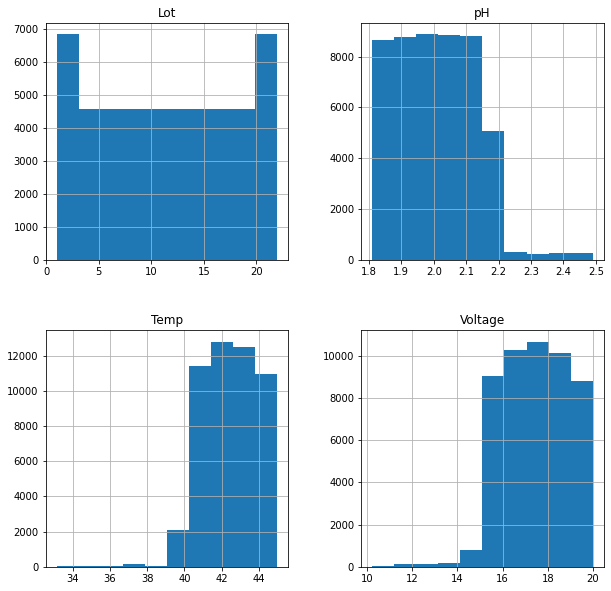

In [77]:
# 데이터 분포 확인
dedicated_data.hist(figsize=(10, 10))
# pH : 2.0을 기준으로 데이터가 분포
# Temp : 42.0을 기준으로 데이터가 분포
# Voltage : 17을 기준으로 데이터가 분포

8. 데이터 상관관계 분석

In [78]:
correlation = dedicated_data.corr()
correlation
# 컬럼간의 상관관계가 거의 없으므로 다중공선성 문제가 발생하지 않는다
# 다중공선성문제(Multicollinearity) : 통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제이다

,Lot,pH,Temp,Voltage
Lot,1.000000,-0.011503,0.005429,0.001803
pH,-0.011503,1.000000,-0.032165,-0.030503
Temp,0.005429,-0.032165,1.000000,0.022263
Voltage,0.001803,-0.030503,0.022263,1.000000


9. 데이터 상관관계 시각화

<AxesSubplot:>

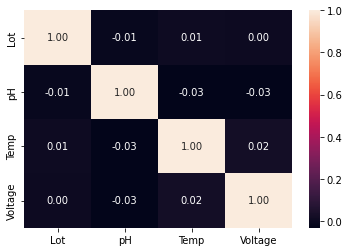

In [80]:
# annot : 각 cell의 값 표기 유무
# fmt : 그 값의 데이터 타입 설정
sns.heatmap(correlation, annot=True, fmt='.2f')
# 모든 데이터 상관관계가 매우 낮은 상관관계를 보이는 것을 알 수 있다

## Error Lot list

1. Error Data Read

In [81]:
error = pd.read_csv(os.path.join(root_dir, error_list), sep=',', encoding='utf-8')
error

,0,1,2
0,2021-09-06,NaN,NaN
1,2021-09-07,NaN,NaN
2,2021-09-08,20.0,NaN
3,2021-09-09,16.0,5.0
4,2021-09-10,NaN,NaN
5,2021-09-13,NaN,NaN
6,2021-09-14,NaN,NaN
7,2021-09-15,NaN,NaN
8,2021-09-16,4.0,NaN
9,2021-09-17,NaN,NaN


2. null값 포함하는 행 제거

In [82]:
# thresh=2 : threshold(임계값) 설정,
# NaN이 2개 이상 있는 것에 대해서만 삭제해버린다는 의미
error_drop = error.dropna(thresh=2)
error_drop

,0,1,2
2,2021-09-08,20.0,NaN
3,2021-09-09,16.0,5.0
8,2021-09-16,4.0,NaN
13,2021-09-28,16.0,NaN
16,2021-10-01,21.0,NaN
18,2021-10-06,6.0,NaN
29,2021-10-22,3.0,NaN
30,2021-10-25,16.0,NaN


3. Process Data List 추출

In [88]:
lot_error_lists = []
lot_error_lists1 = error_drop['1'].unique().tolist()
# not 대신 '~'로 nan이 아닌 값만 리스트로 만들기 
lot_error_lists2 = error_drop['2'].unique()[~np.isnan(error_drop['2'].unique())].tolist()

lot_error_lists = lot_error_lists1 + lot_error_lists2
lot_error_lists = list(map(int, lot_error_lists))
d_error_lists = error_drop['0'].unique()

print("Unique LoT List : ", lot_error_lists)
print("Unique Date List : ", d_error_lists)
# 에러난 LoT번호, 날짜만 추출되었다

Unique LoT List :  [20, 16, 4, 21, 6, 3, 5]
Unique Date List :  ['2021-09-08' '2021-09-09' '2021-09-16' '2021-09-28' '2021-10-01'
 '2021-10-06' '2021-10-22' '2021-10-25']
